In [1]:
# run this first if needed to get the rest of the imports right
import os
# os.chdir('../../')
os.chdir('/data/jeff-law/projects/fungcat/2019-11-fastsinksource')
os.getcwd()

'/data/jeff-law/projects/fungcat/2019-11-fastsinksource'

In [17]:
from collections import defaultdict
import argparse
import os, sys
from tqdm import tqdm
import itertools
#import utils.file_utils as utils
# also compute the significance of sinksource vs local
#from scipy.stats import kruskal, mannwhitneyu
# plotting imports
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'
import pandas as pd
import seaborn as sns
import numpy as np
print("python version: %s" % (sys.version.split('\n')[0]))
print("matpltlib version: %s" % matplotlib.__version__)
print("seaborn version: %s" % sns.__version__)
print("pandas version: %s" % pd.__version__)
print("numpy version: %s" % (np.__version__))
# make this the default for now
sns.set_style('darkgrid')
# my local imports
# fss_dir = os.path.dirname(os.path.dirname(os.path.dirname(__file__)))
# sys.path.insert(0,fss_dir)
from FastSinkSource.src.plot import plot_utils
from FastSinkSource.src.algorithms import runner

%matplotlib inline

python version: 3.6.8 |Anaconda, Inc.| (default, Dec 30 2018, 01:22:34) 
matpltlib version: 3.1.3
seaborn version: 0.9.0
pandas version: 0.23.0
numpy version: 1.17.2


In [3]:
def load_results(config_files):
    full_config_map = None
    df_all = pd.DataFrame()
    kwargs = {}
    for param, config_file in config_files.items():
        print(param)
        
        full_config_map = config_map if full_config_map is None else full_config_map
        full_config_map['algs']['birgrank'][param] = config_map['algs']['birgrank'][param]

        # load the results for this set of params

        # keep only the most specific terms
        kwargs['most_specific_terms'] = True
        # load the fmax values
        df = plot_utils.load_all_results(input_settings, alg_settings, output_settings, **kwargs)
        df['exp_label'] = kwargs['exp_label']
    #     print(len(df.index), len(config_map['algs']['birgrank'][param]))
    #     if param == 'alpha':
    #         df['param_val'] = 
        df_all = pd.concat([df_all, df])


    # print(full_config_map)
    plot_utils.results_overview(df_all)
    return df_all, out_pref

In [63]:
config_file = "config-files/sp27-plot/params/async_rw/spCore-combinations-Yneg-bp-leaf.yaml"
config_map = plot_utils.load_config_file(config_file)
kwargs = {}
input_settings, alg_settings, output_settings, out_pref, kwargs = plot_utils.setup_variables(
        config_map, '', **kwargs)

In [64]:
# load the fmax values
df_all = plot_utils.load_all_results(input_settings, alg_settings, output_settings, **kwargs)
df_all.replace('spEXPC','', inplace=True)
plot_utils.results_overview(df_all)

36 combinations for async_rw
	reading outputs//net-versions/2019_10-sp200-eval-e0_1-stringv11-700/net-exp-auprc-smin/expc-bp-Yneg/async_rw/loso-swsn-a0_01-minl0-maxl10-spleaf.txt
	reading outputs//net-versions/2019_10-sp200-eval-e0_1-stringv11-700/net-exp-auprc-smin/expc-bp-Yneg/async_rw/loso-swsn-a0_01-minl1-maxl10-spleaf.txt
	reading outputs//net-versions/2019_10-sp200-eval-e0_1-stringv11-700/net-exp-auprc-smin/expc-bp-Yneg/async_rw/loso-swsn-a0_01-minl2-maxl10-spleaf.txt
	reading outputs//net-versions/2019_10-sp200-eval-e0_1-stringv11-700/net-exp-auprc-smin/expc-bp-Yneg/async_rw/loso-swsn-a0_01-minl3-maxl10-spleaf.txt
	reading outputs//net-versions/2019_10-sp200-eval-e0_1-stringv11-700/net-exp-auprc-smin/expc-bp-Yneg/async_rw/loso-swsn-a0_05-minl0-maxl10-spleaf.txt
	reading outputs//net-versions/2019_10-sp200-eval-e0_1-stringv11-700/net-exp-auprc-smin/expc-bp-Yneg/async_rw/loso-swsn-a0_05-minl1-maxl10-spleaf.txt
	reading outputs//net-versions/2019_10-sp200-eval-e0_1-stringv11-700/ne

In [65]:
df_alpha = []
alpha_vals = ['a0_01', 'a0_05', 'a0_1', 'a0_25', 'a0_5', 'a0_75', 'a0_9', 'a0_95', 'a0_99']
for alg, df2 in df_all.groupby('Algorithm'):
    for plot_exp_name, df in df2.groupby('plot_exp_name'):
        for alpha in alpha_vals:
            if "-%s-" % (alpha) in alg:
                df['alpha'] = alpha.replace('a','').replace('_','.')
                df['min_len'] = df['Algorithm'].apply(lambda x: x.replace("async_rw-swsn-%s-minl"%alpha,'').replace('-maxl10',''))
        if len(df) < 200:
            continue
        df_alpha.append(df)
df_all2 = pd.concat(df_alpha)
#     df_all['']

# df_all['Algorithm'] = df_all['Algorithm'].replace("async_rw-swsn-a0_01-minl0-maxl10")
df_all2.head()

/data/jeff-law/tools/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/data/jeff-law/tools/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,#taxon,#goid,fmax,avgp,auprc,auroc,# test ann,eprec-reck1,Algorithm,net_version,exp_name,weight_method,plot_exp_name,alpha,min_len
0,100226,GO:0044237,0.8462,0.9267,0.9258,0.8492,14,0.7857,async_rw-swsn-a0_01-minl0-maxl10,net-versions/2019_10-sp200-eval-e0_1-stringv11...,net-exp-auprc-smin/expc-bp-Yneg-ssnC-stringC-s...,swsn,"ssnC+stringC,ssnLocal",0.01,0
1,100226,GO:0071704,0.6667,0.6993,0.6804,0.7010,12,0.6667,async_rw-swsn-a0_01-minl0-maxl10,net-versions/2019_10-sp200-eval-e0_1-stringv11...,net-exp-auprc-smin/expc-bp-Yneg-ssnC-stringC-s...,swsn,"ssnC+stringC,ssnLocal",0.01,0
2,1111708,GO:0044249,0.6000,0.6535,0.6142,0.6768,11,0.5455,async_rw-swsn-a0_01-minl0-maxl10,net-versions/2019_10-sp200-eval-e0_1-stringv11...,net-exp-auprc-smin/expc-bp-Yneg-ssnC-stringC-s...,swsn,"ssnC+stringC,ssnLocal",0.01,0
3,1111708,GO:0065007,0.6667,0.6999,0.6908,0.7594,10,0.6000,async_rw-swsn-a0_01-minl0-maxl10,net-versions/2019_10-sp200-eval-e0_1-stringv11...,net-exp-auprc-smin/expc-bp-Yneg-ssnC-stringC-s...,swsn,"ssnC+stringC,ssnLocal",0.01,0
4,1111708,GO:1901576,0.5625,0.6165,0.5838,0.5900,10,0.4000,async_rw-swsn-a0_01-minl0-maxl10,net-versions/2019_10-sp200-eval-e0_1-stringv11...,net-exp-auprc-smin/expc-bp-Yneg-ssnC-stringC-s...,swsn,"ssnC+stringC,ssnLocal",0.01,0


In [56]:
df_all2.tail()

,#taxon,#goid,fmax,avgp,auprc,auroc,# test ann,eprec-reck1,Algorithm,net_version,exp_name,weight_method,plot_exp_name,alpha,min_len
339,83333,GO:0042401,0.8889,0.9152,0.9131,0.9989,10,0.8,async_rw-swsn-a0_99-minl3-maxl10,net-versions/2019_10-sp200-eval-e0_1-stringv11...,net-exp-auprc-smin/expc-bp-Yneg,swsn,ssnT+ssnC+stringT+stringC,0.99,3
340,83333,GO:0009273,0.1250,0.0213,0.0150,0.5352,10,0.1,async_rw-swsn-a0_99-minl3-maxl10,net-versions/2019_10-sp200-eval-e0_1-stringv11...,net-exp-auprc-smin/expc-bp-Yneg,swsn,ssnT+ssnC+stringT+stringC,0.99,3
341,83333,GO:0018205,0.3333,0.2356,0.2305,0.6259,10,0.2,async_rw-swsn-a0_99-minl3-maxl10,net-versions/2019_10-sp200-eval-e0_1-stringv11...,net-exp-auprc-smin/expc-bp-Yneg,swsn,ssnT+ssnC+stringT+stringC,0.99,3
342,83333,GO:0046493,0.5333,0.5030,0.4935,0.9835,10,0.4,async_rw-swsn-a0_99-minl3-maxl10,net-versions/2019_10-sp200-eval-e0_1-stringv11...,net-exp-auprc-smin/expc-bp-Yneg,swsn,ssnT+ssnC+stringT+stringC,0.99,3
343,83333,GO:0019184,0.3810,0.2486,0.2098,0.8217,10,0.3,async_rw-swsn-a0_99-minl3-maxl10,net-versions/2019_10-sp200-eval-e0_1-stringv11...,net-exp-auprc-smin/expc-bp-Yneg,swsn,ssnT+ssnC+stringT+stringC,0.99,3


In [81]:
def plot_param_results(df, measure='fmax', ax=None):
    if ax is None:
        f, ax = plt.subplots()
    ax = sns.pointplot(x='alpha', y=measure, data=df, ax=ax,
                  hue='min_len',
                  estimator=np.median, ci=None,
                  palette="colorblind", saturation=0.8,
                       markers=["o", "^", "P","X"],
                       dodge=0.4
                    )
    ax.set_xlabel(r"$\alpha$", fontsize=12, fontweight='bold')
    plt.setp(ax.lines,linewidth=1)  # set lw for all lines of g axes
    ax.legend(title='Min Walk \n Length')
    # remove the legend title
#     handles, labels = ax.get_legend_handles_labels()
#     ax.legend(handles=handles[:], labels=labels[:])
    return ax

ssnT+ssnC+stringT+stringC
ssnC+stringC,ssnLocal
outputs/viz/params/async_rw-alpha-minlen.pdf


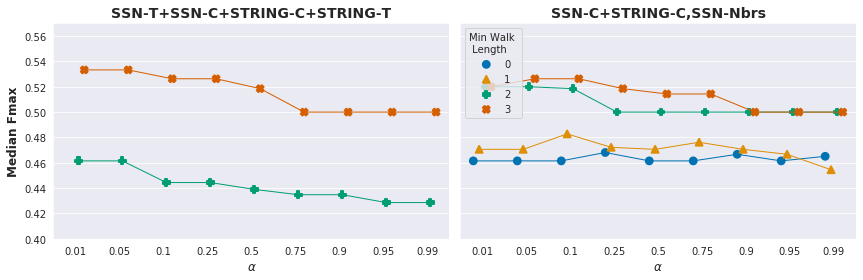

In [86]:
f, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(12,4))
# for ax, (plot_exp_name, df) in zip([ax1, ax2], df_all2.groupby("plot_exp_name")):
for ax, plot_exp_name in zip([ax1, ax2], ["ssnT+ssnC+stringT+stringC", "ssnC+stringC,ssnLocal"]):
    print(plot_exp_name)
    df = df_all2[df_all2['plot_exp_name'] == plot_exp_name]
    plot_param_results(df, ax=ax)
    ax.set_title(plot_exp_name, fontsize=14, fontweight='bold')
# ax = plot_param_results(df_all2)
ax1.set_ylabel("Median Fmax", fontsize=12, fontweight='bold')
ax2.set_ylabel("")
ax1.get_legend().remove()
plt.tight_layout()

ax1.set_ylim(0.4, 0.57)
ax2.set_ylim(0.4, 0.57)
ax1.set_title("SSN-T+SSN-C+STRING-C+STRING-T", fontsize=14, fontweight='bold')
ax2.set_title("SSN-C+STRING-C,SSN-Nbrs", fontsize=14, fontweight='bold')

out_file = "outputs/viz/params/async_rw-alpha-minlen.pdf"
os.makedirs(os.path.dirname(out_file), exist_ok=True)
print(out_file)
plt.savefig(out_file)
plt.show()
plt.close()

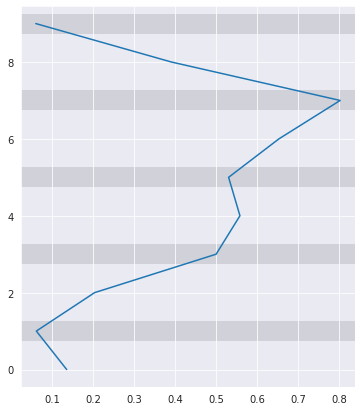

In [97]:
x = np.random.random(10)
# y = np.random.random(10)
y = np.arange(10)
f, ax = plt.subplots(figsize=(6,7))
for i in range(len(y)):
    if i % 2:
        ax.axhline(i, linewidth=20, color=c2, zorder=0)
    
ax.plot(x, y)
# alternate these colors
c1, c2 = "#eaeaf2", "#d1d1d9"
table_colors = []

#         ax.axhline(i, color=c1)
#         table_colors.append([c1])
# ax.table(cellColours=table_colors,edges='RL') #edges='horizontal')
# plt.